# Dummy Variables

Aparts from the offensive side of the word, there is another meaning, an imitatiom or a copy that stands as a substitute.

In regression analysis, a dummy is a variable that is uesd to include categorical data into a regression model, such like gender, season or the brand.

The dummy means we are imitation of categories with numbers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [3]:
# attendance is measure if a student attended more than 75% of the university lectures
# this is categorical data, so we can't simply put it in the regression
# usually, we would map the 'yes' and 'no' values with 1 and 0
# so the student attended more than 75% that dummy will be equal to 1, otherwise 0

raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [4]:
data = raw_data.copy()

In [5]:
data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

In [6]:
# the categorical data in the series was replaced or mapped to numerical

data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [7]:
# the Attendance mean is 0.4642 is lower than 0.5
# that means there are more 0 than 1

data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [8]:
y = data['GPA']

In [9]:
x1 = data[['SAT','Attendance']]

In [10]:
x = sm.add_constant(x1)

/Users/How.Short/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [11]:
results = sm.OLS(y,x).fit()

In [12]:
# the overall model are significant
# the SAT and the dummy are both significant
# with the Attendance the adj R-squared is 0.555
# it is greater than without Attendance(0.399)
# without dummy variable was GPA = 0.275 + 0.0017SAT
# with dummy variable was GPA = 0.6439 + 0.0014SAT + 0.2226Dummy
# the dummy variable is 0 or 1
# so we can represent this equation with two others
# student didn't attend the dummy will be 0, the equation is GPA = 0.6439 + 0.0014SAT + 0.2226*0
# student didn't attend the dummy will be 0, the equation is GPA = 0.6439 + 0.0014SAT
# student did attend the dummy will be 1, the equation is GPA = 0.6439 + 0.0014SAT + 0.2226*1
# student did attend the dummy will be 1, the equation is GPA = 0.8665 + 0.0014SAT

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 26 Dec 2019   Prob (F-statistic):           2.19e-15
Time:                        16:33:40   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

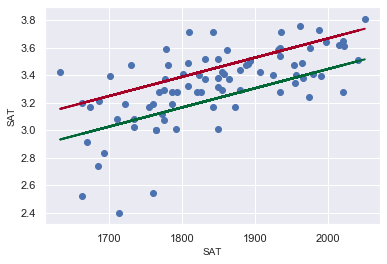

In [13]:
# two equations that they have the same slope but different intercept
# the student attended are spread around the upper line
# on average the GPD of those who attended is 0.2226 higher

plt.scatter(data['SAT'], y)

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = '#a50026')

plt.xlabel('SAT', fontsize = 10)
plt.ylabel('SAT', fontsize = 10)

plt.show()

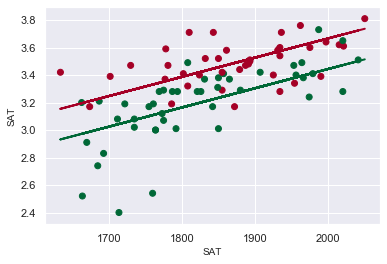

In [14]:
plt.scatter(data['SAT'], y, c = data['Attendance'], cmap = 'RdYlGn_r')

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']

fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = '#a50026')

plt.xlabel('SAT', fontsize = 10)
plt.ylabel('SAT', fontsize = 10)

plt.show()

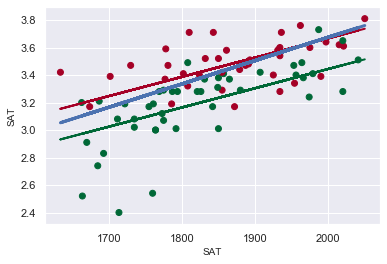

In [15]:
# it is steeper and goes somewhat between the two lines of the dummies

plt.scatter(data['SAT'], y, c = data['Attendance'], cmap = 'RdYlGn_r')

yhat_no = 0.6439 + 0.0014 * data['SAT']
yhat_yes = 0.8665 + 0.0014 * data['SAT']
yhat = 0.275 + 0.0017 * data['SAT']

fig = plt.plot(data['SAT'], yhat_no, lw = 2, c = '#006837', label = 'regression line1')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c = '#a50026', label = 'regression line2')
fig = plt.plot(data['SAT'], yhat, lw = 3, c = '#4C72B0', label = 'regression line')

plt.xlabel('SAT', fontsize = 10)
plt.ylabel('SAT', fontsize = 10)

plt.show()

# Making Predictions

There is a StatsModels method which takes a data frame organized in the similar way as x, and then make predictions.

In [16]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [17]:
# this is we will check

new_data = pd.DataFrame({'const':1, 'SAT':[1700,1670], 'Attendance':[0,1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [18]:
# change the index name

new_data.rename(index = {0:'Bob', 1:"Alice"})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [19]:
predictions = results.predict(new_data)

In [20]:
# use the results modle results = sm.OLS(y,x).fit()
# to predict the Bob and Alice GPA
# this is predictions result

predictions

0    3.023513
1    3.204163
dtype: float64

In [21]:
# Alice SAT lowew than Bob
# but Alice attended more than 75%
# so the Alice GPA is higher than Bob

predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index = {0:'Bob', 1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
